İçerik

Bu veri seti, öğrencilerin çeşitli konularda kazandıkları notlardan oluşmaktadır. 

https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/code

    
teşekkürler
http://roycekimmons.com/tools/generated_data/exams
https://www.kaggle.com/code/chingchunyeh/students-performance-in-exams


Hangi faktörün öğrencinin performansını etkileyebileceğini bilmek için puanı birkaç dereceye ayırır ve hangi özelliğin puanı daha önemli etkilediğini buluruz. Bağımsız değişkenler aşağıdaki gibidir:

cinsiyet : öğrencilerin cinsiyeti
    
ırk/etnisite : öğrencilerin etnik kökeni
    
ebeveyn eğitim seviyesi: ebeveynlerin son eğitimi
    
öğle yemeği : testten önce öğle yemeği yemek (normal veya anormal)
    
sınava hazırlık kursu: sınavdan önce tamamlandı veya tamamlanmadı

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('StudentsPerformance.csv')

### EDA- exploratory data analysis

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
812,female,group C,master's degree,standard,completed,54,64,67


In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.isnull().sum()# boş verimiz yok

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Data Visualization

/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bmaho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

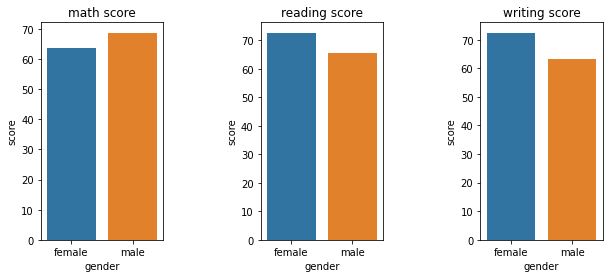

In [7]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = data.groupby("gender")[list(data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data.columns[-3:])[idx])
    
plt.show()

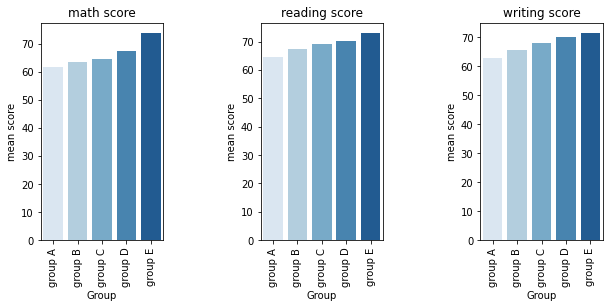

In [8]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = data.groupby("race/ethnicity")[list(data.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Blues")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(data.columns[-3:])[idx])
plt.show()

In [9]:
labelencoder = LabelEncoder()
data2 = data.copy()
data2["parental level of education"] = labelencoder.fit_transform(data2["parental level of education"])
data2["test preparation course"] = labelencoder.fit_transform(data2["test preparation course"])
data2["lunch"] = labelencoder.fit_transform(data2["lunch"])
data2.head() #veri setindeki kategorik değişkenleri sayısal değerlere dönüştürdük

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


### Machine Learning Algorithms

In [10]:
from sklearn.cluster import KMeans #en yakın komşu benzerliklerimizi buluyor
from sklearn.metrics import silhouette_score #başarı oranını ölçen 

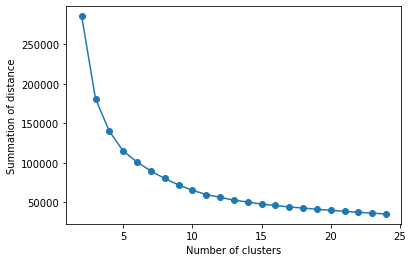

In [11]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(data2.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
x=data2[["parental level of education","lunch","test preparation course"]]

In [14]:
model=KMeans(n_clusters=4)

In [15]:
model=model.fit(x)

In [16]:
x.head()

,parental level of education,lunch,test preparation course
0,1,1,1
1,4,1,0
2,3,1,1
3,0,0,1
4,4,1,1


In [17]:
tahmin=model.predict(x) #benzerliklerine göre kümeledi

In [18]:
tahmin

array([1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 3, 1, 3, 0, 2, 1, 0,
       0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 3, 1, 2, 2, 0, 3, 1, 3, 2, 2, 3, 3,
       3, 0, 2, 2, 0, 0, 2, 3, 3, 2, 3, 1, 3, 0, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 3, 1, 1, 1, 2, 0, 2, 3, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 3,
       2, 1, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 0, 1, 0, 1, 3, 0, 0, 1, 0, 3,
       0, 0, 1, 1, 3, 1, 2, 0, 3, 0, 0, 1, 0, 0, 3, 2, 1, 2, 3, 1, 2, 1,
       3, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 2, 1, 0,
       1, 2, 0, 3, 0, 0, 1, 2, 3, 2, 1, 3, 3, 1, 2, 0, 3, 0, 0, 2, 3, 1,
       0, 1, 2, 0, 2, 2, 0, 3, 1, 1, 0, 0, 3, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       1, 2, 3, 3, 2, 0, 0, 1, 3, 0, 0, 2, 1, 3, 1, 2, 1, 3, 0, 2, 1, 1,
       1, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 0, 1, 0, 2, 2, 0, 0, 3, 0, 3, 1,
       1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 1, 1, 1, 0, 3, 2,
       2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 3, 2, 1, 2, 0,

In [19]:
x['cluster']=tahmin

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_10839/1051485789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [20]:
x['cluster'].unique()

array([1, 0, 2, 3], dtype=int32)

In [21]:
silhouette_score(x,tahmin) #benzerlik skoru

0.5983652155099609

In [22]:
#Elbow Method- Dirsek Metodu (Dirsek nerede kırılmaya başlarsa o kadar gruba ayırmanız gerekiyor)

In [23]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))
              

In [24]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 3, 1, 3, 0, 2, 1, 0,
       0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 0, 2, 0, 1, 3, 1, 2, 2, 0, 3, 1, 3, 2, 2, 3, 3,
       3, 0, 2, 2, 0, 0, 2, 3, 3, 2, 3, 1, 3, 0, 2, 1, 0, 2, 1, 0, 0, 2,
       0, 3, 1, 1, 1, 2, 0, 2, 3, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 3,
       2, 1, 2, 0, 1, 1, 1, 1, 3, 0, 1, 2, 0, 1, 0, 1, 3, 0, 0, 1, 0, 3,
       0, 0, 1, 1, 3, 1, 2, 0, 3, 0, 0, 1, 0, 0, 3, 2, 1, 2, 3, 1, 2, 1,
       3, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 3, 0, 2, 1, 0,
       1, 2, 0, 3, 0, 0, 1, 2, 3, 2, 1, 3, 3, 1, 2, 0, 3, 0, 0, 2, 3, 1,
       0, 1, 2, 0, 2, 2, 0, 3, 1, 1, 0, 0, 3, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       1, 2, 3, 3, 2, 0, 0, 1, 3, 0, 0, 2, 1, 3, 1, 2, 1, 3, 0, 2, 1, 1,
       1, 0, 3, 2, 2, 1, 1, 1, 3, 0, 3, 0, 1, 0, 2, 2, 0, 0, 3, 0, 3, 1,
       1, 3, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 3, 1, 3, 1, 1, 1, 1, 0, 3, 2,
       2, 3, 1, 3, 2, 3, 3, 1, 1, 2, 3, 2, 1, 2, 0,

In [25]:
data2 = data2.rename(columns={"parental level of education": "education"})

In [26]:
data2 = data2.rename(columns={"test preparation course": "course"})

In [27]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.5097046077331571
Number of cluster 3,silhouette0.5988074708501923
Number of cluster 4,silhouette0.5983652155099609
Number of cluster 5,silhouette0.5708617519232031
Number of cluster 6,silhouette0.5407880041130413
Number of cluster 7,silhouette0.5421095941437803
Number of cluster 8,silhouette0.5193890638411406
Number of cluster 9,silhouette0.5428676649656429


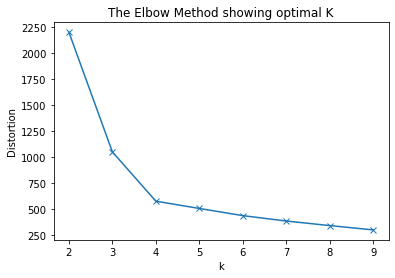

In [28]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() #4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?


In [29]:
x=data2[["education","lunch","course"]]

In [30]:
model=KMeans(n_clusters=4)

In [31]:
model=model.fit(x)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


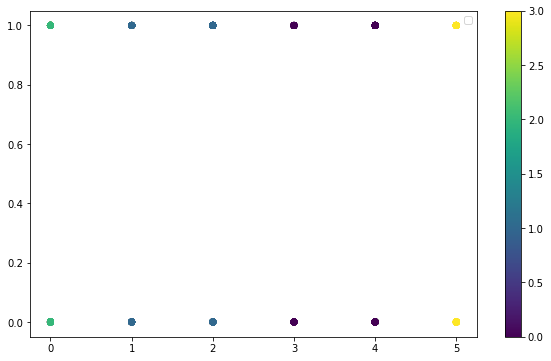

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(data2.education,data2.course,c=tahmin)
plt.legend()
plt.colorbar()
plt.show()

In [33]:
x=data2[["math score","reading score","writing score"]] 

In [34]:
model=KMeans(n_clusters=4)

In [35]:
model=model.fit(x)

In [36]:
data2 = data2.rename(columns={"math score": "math_score"})

In [37]:
data2 = data2.rename(columns={"reading score": "reading_score"})

In [38]:
data2 = data2.rename(columns={"writing score": "writing_score"})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


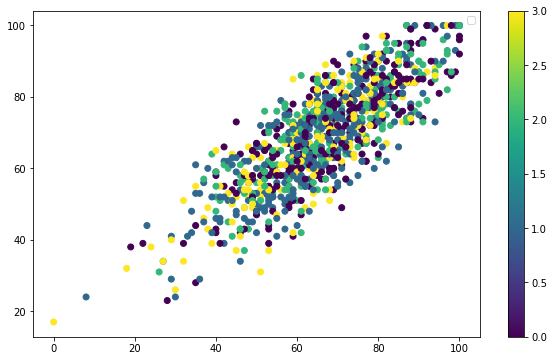

In [39]:
plt.figure(figsize=(10,6))
plt.scatter(data2.math_score,data2.reading_score,c=tahmin)
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


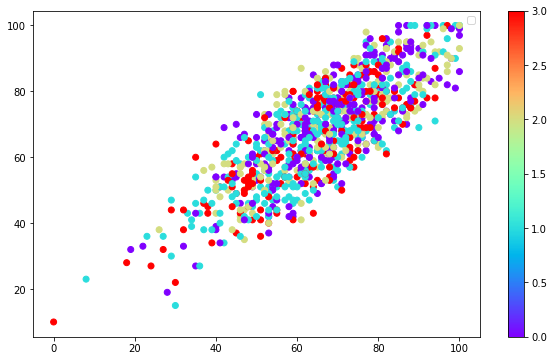

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(data2.math_score,data2.writing_score,c=tahmin,cmap='rainbow')
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


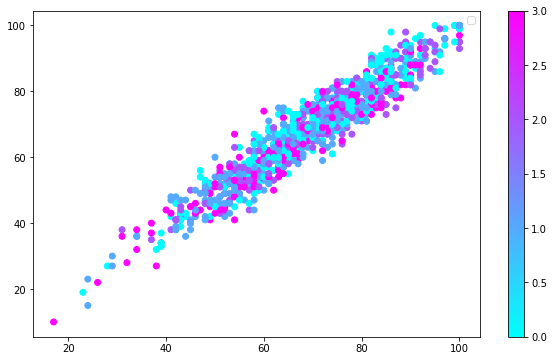

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(data2.reading_score,data2.writing_score,c=tahmin,cmap='cool')
plt.legend()
plt.colorbar()
plt.show()